In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
np.random.seed = 42

In [35]:
df = pd.read_csv('lung_cancer_prediction_dataset.csv')
df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [36]:
df.columns


Index(['ID', 'Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')

Tabela korelacji:
                            Age  Years_of_Smoking  Cigarettes_per_Day  \
Age                    1.000000          0.002092            0.001196   
Years_of_Smoking       0.002092          1.000000            0.708114   
Cigarettes_per_Day     0.001196          0.708114            1.000000   
Passive_Smoker        -0.000087          0.003588            0.002164   
Family_History         0.002228         -0.001280           -0.001010   
Lung_Cancer_Diagnosis  0.001578          0.100779            0.109157   
Occupational_Exposure -0.001637         -0.000151            0.001458   
Indoor_Pollution       0.002284         -0.001969           -0.001013   

                       Passive_Smoker  Family_History  Lung_Cancer_Diagnosis  \
Age                         -0.000087        0.002228               0.001578   
Years_of_Smoking             0.003588       -0.001280               0.100779   
Cigarettes_per_Day           0.002164       -0.001010               0.109157   
Pass

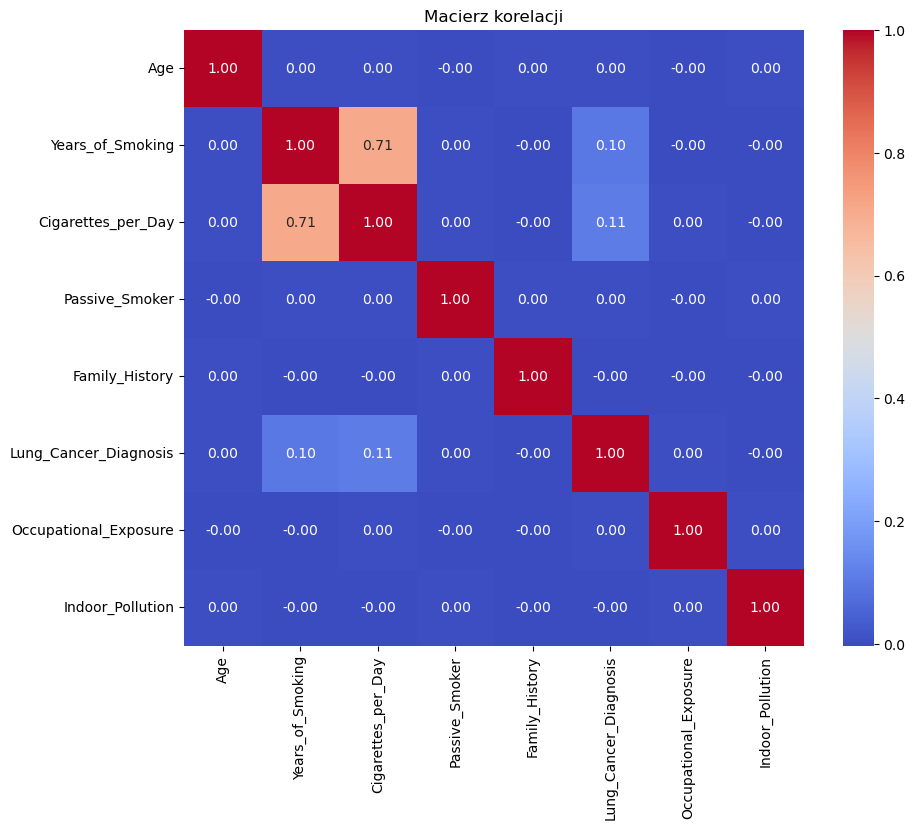

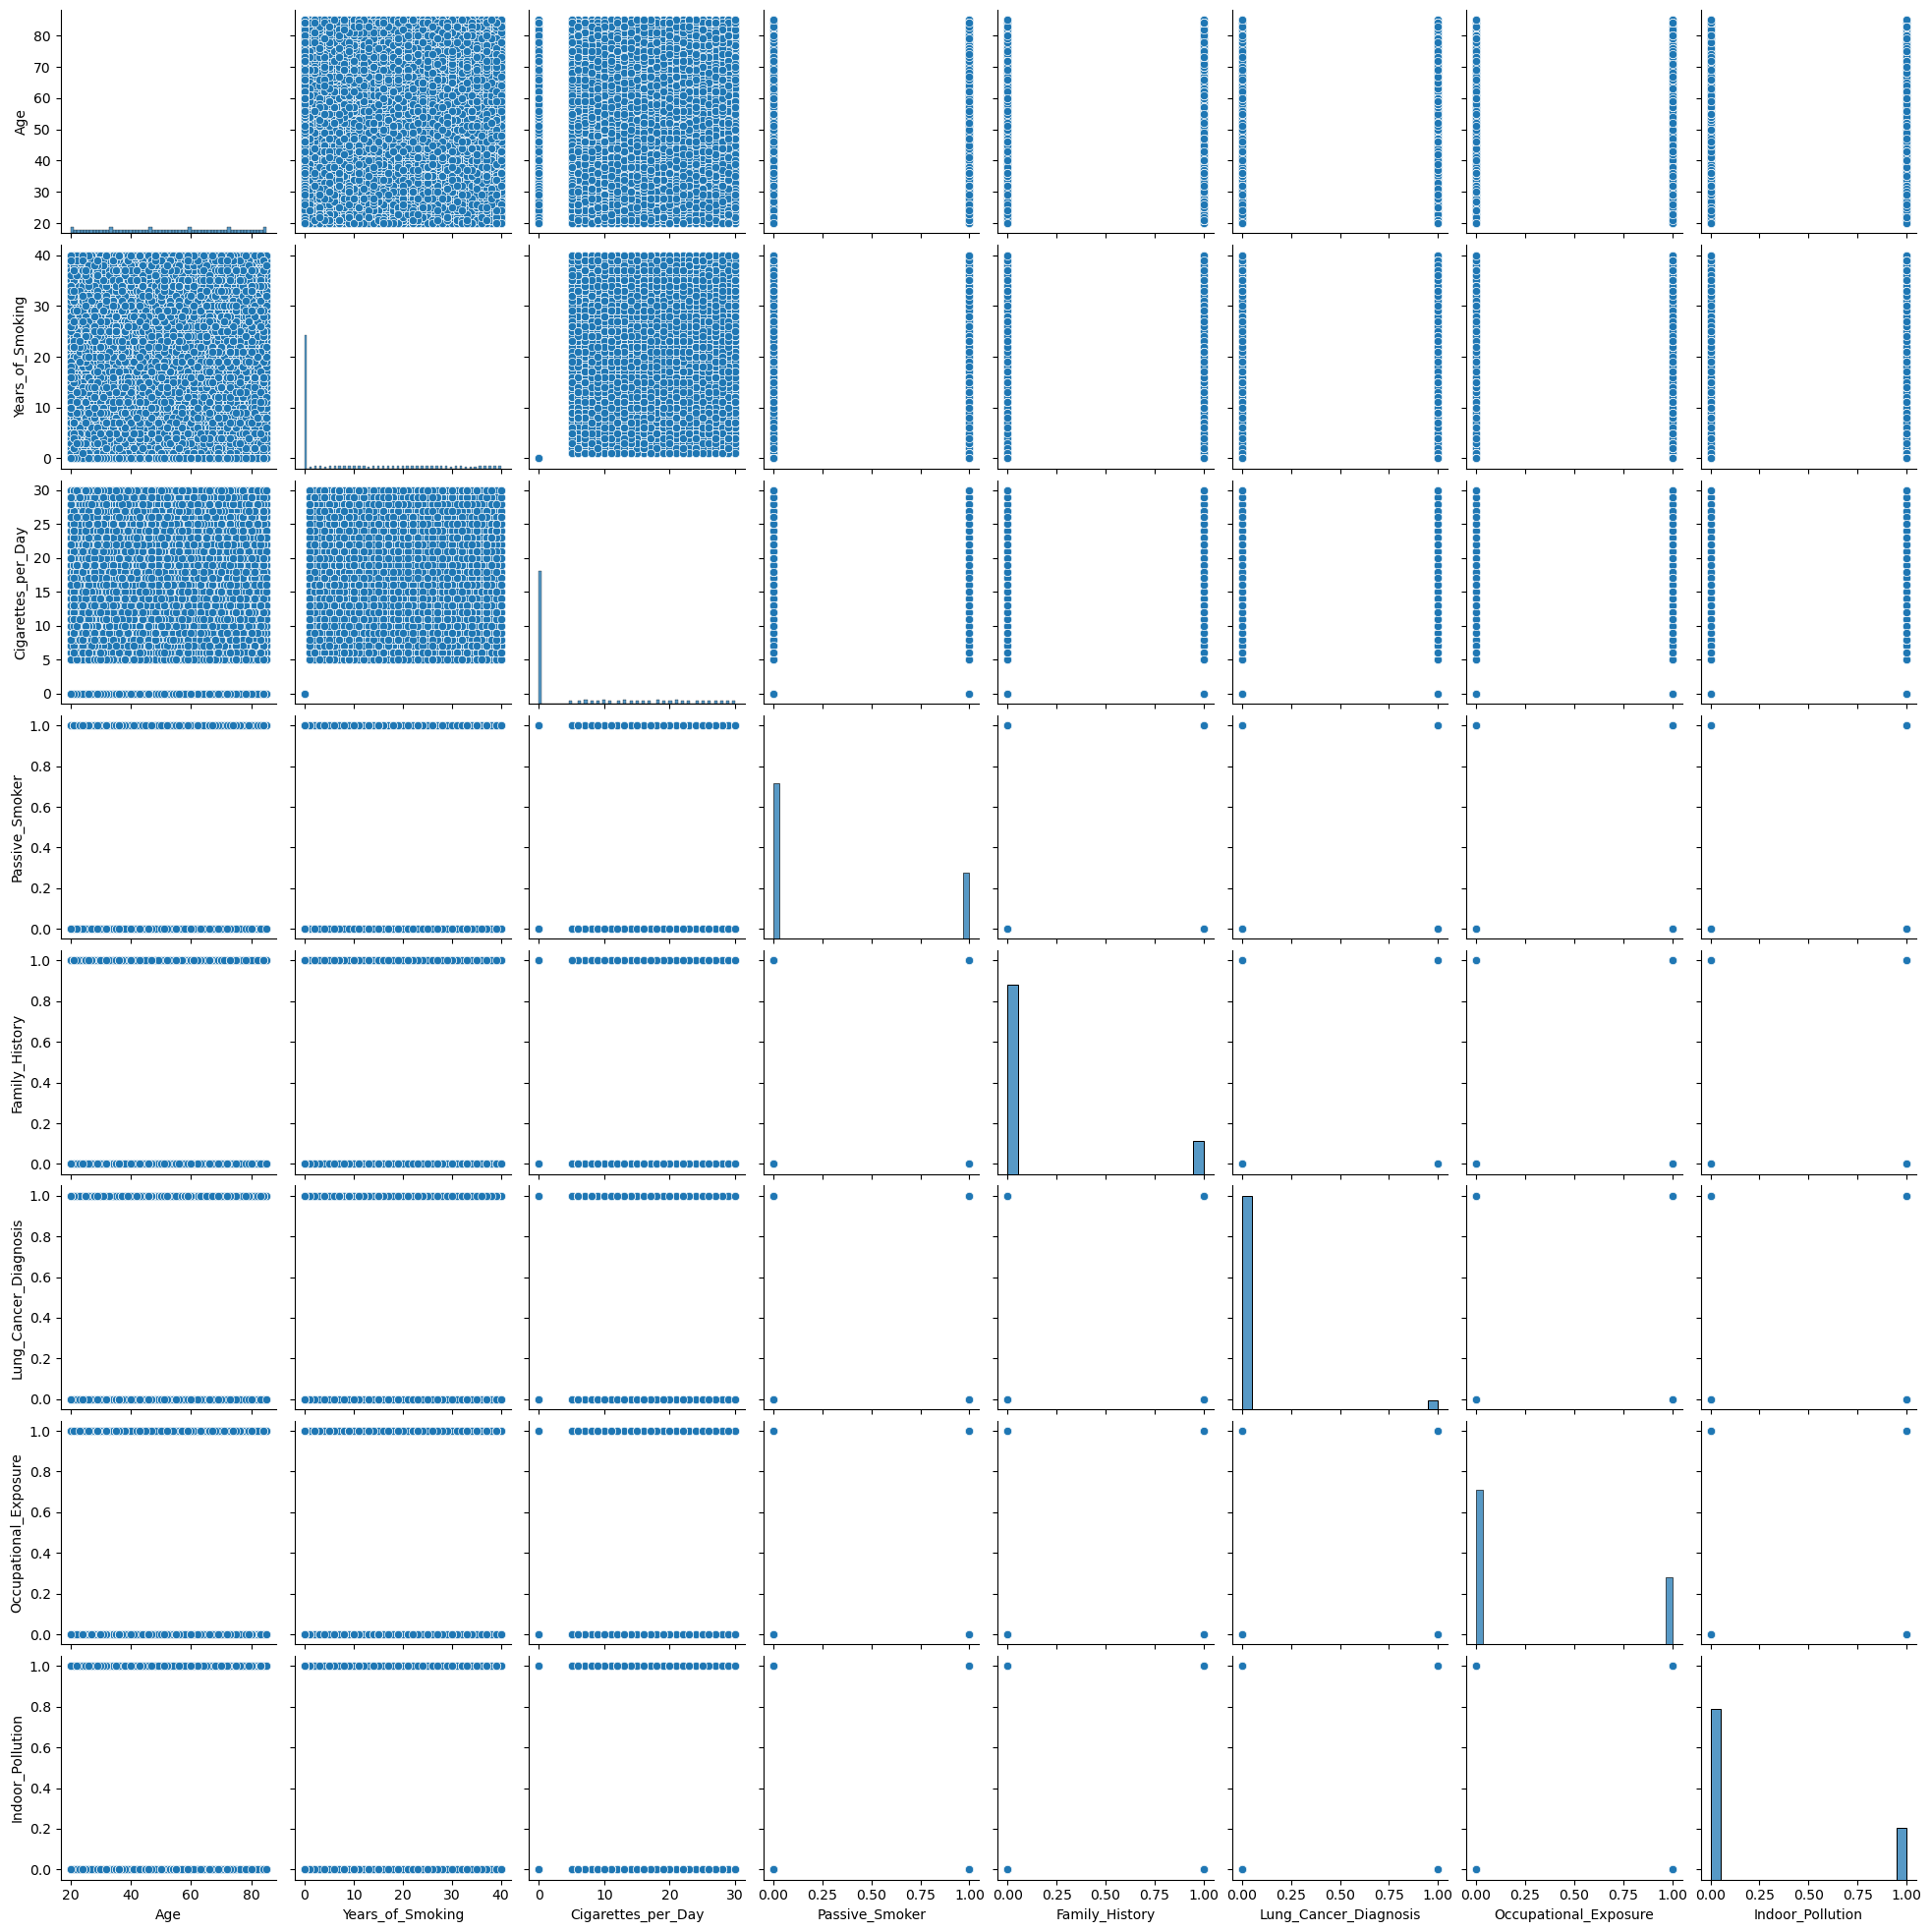

In [ ]:
df = df[['Age', 'Gender', 'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
         'Family_History', 'Lung_Cancer_Diagnosis', 'Air_Pollution_Exposure',
         'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access']]

# Zamiana 'yes'/'no' na 1/0
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Tworzenie tabeli korelacji
correlation_matrix = df.corr(numeric_only=True)
print("Tabela korelacji:")
print(correlation_matrix)

# Wizualizacja korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

# Wykresy punktowe dla każdej pary kolumn
#sns.pairplot(df)
#plt.show()


In [38]:
df.columns

Index(['Age', 'Gender', 'Years_of_Smoking', 'Cigarettes_per_Day',
       'Passive_Smoker', 'Family_History', 'Lung_Cancer_Diagnosis',
       'Air_Pollution_Exposure', 'Occupational_Exposure', 'Indoor_Pollution',
       'Healthcare_Access'],
      dtype='object')

In [39]:
import pandas as pd

def validate_and_clean_data(df):
    invalid_rows = []
    reasons = []
    
    # Sprawdzenie 1: Years_of_Smoking nie może być większe niż Age
    mask = df['Years_of_Smoking'] > df['Age']
    invalid_rows.extend(df[mask].index.tolist())
    reasons.extend(["Years_of_Smoking > Age"] * mask.sum())
    
    # Sprawdzenie 2: Jeśli Years_of_Smoking == 0, to Cigarettes_per_Day powinno być 0
    mask = (df['Years_of_Smoking'] == 0) & (df['Cigarettes_per_Day'] > 0)
    invalid_rows.extend(df[mask].index.tolist())
    reasons.extend(["Cigarettes_per_Day > 0 despite Years_of_Smoking == 0"] * mask.sum())
    
    # Tworzenie DataFrame z błędnymi rekordami
    invalid_df = df.loc[invalid_rows].copy()
    invalid_df['Reason'] = reasons
    
    # Usuwanie błędnych rekordów
    df_cleaned = df.drop(index=invalid_rows)
    
    # Sprawdzenie liczby wierszy z NaN/null
    missing_values_rows = df_cleaned.isnull().any(axis=1).sum()
    
    return invalid_df, df_cleaned, missing_values_rows


invalid_rows_df, cleaned_df, missing_values_count = validate_and_clean_data(df)
print("Invalid records:")
print(invalid_rows_df)
print(f"Number of rows with missing values after cleanup: {missing_values_count}")


Invalid records:
        Age  Gender  Years_of_Smoking  Cigarettes_per_Day  Passive_Smoker  \
8        32    Male                37                  29               0   
34       24    Male                28                  17               0   
40       20    Male                39                  20               0   
67       24  Female                30                  13               1   
74       29    Male                36                  17               1   
...     ...     ...               ...                 ...             ...   
220507   29    Male                39                  25               0   
220520   25    Male                36                  26               0   
220567   32  Female                40                  11               0   
220594   25  Female                37                   9               1   
220626   36  Female                40                  26               1   

        Family_History  Lung_Cancer_Diagnosis Air_Pollutio

In [40]:
mask = (df['Years_of_Smoking'] == 0) & (df['Cigarettes_per_Day'] > 0)
print(f"Liczba rekordów niespełniających warunku 'Years_of_Smoking == 0' -> 'Cigarettes_per_Day == 0': {mask.sum()}")


Liczba rekordów niespełniających warunku 'Years_of_Smoking == 0' -> 'Cigarettes_per_Day == 0': 0


In [41]:
df = df.drop(index=invalid_rows_df.index)


In [42]:
df.describe()

,Age,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Occupational_Exposure,Indoor_Pollution
count,213715.000000,213715.000000,213715.000000,213715.000000,213715.000000,213715.000000,213715.000000,213715.000000
mean,53.366263,7.349082,6.667894,0.298926,0.148885,0.039599,0.301481,0.231313
std,18.763963,11.645881,9.678664,0.457788,0.355976,0.195017,0.458902,0.421673
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,13.000000,13.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,85.000000,40.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
missing_from_describe = set(df.columns) - set(df.describe().columns)
print("Kolumny nieuwzględnione w describe():", missing_from_describe)


Kolumny nieuwzględnione w describe(): {'Healthcare_Access', 'Gender', 'Air_Pollution_Exposure'}


In [44]:
for col in ['Healthcare_Access', 'Gender', 'Air_Pollution_Exposure']:
    print(f"\n{col} - unikalne wartości:")
    print(df[col].value_counts())



Healthcare_Access - unikalne wartości:
Healthcare_Access
Poor    171017
Good     42698
Name: count, dtype: int64

Gender - unikalne wartości:
Gender
Female    108305
Male      105410
Name: count, dtype: int64

Air_Pollution_Exposure - unikalne wartości:
Air_Pollution_Exposure
Medium    106688
Low        53625
High       53402
Name: count, dtype: int64


In [45]:
# Zamiana płci na wartości binarne
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Zamiana poziomu zanieczyszczenia powietrza na liczby porządkowe
df['Air_Pollution_Exposure'] = df['Air_Pollution_Exposure'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Zamiana dostępu do opieki zdrowotnej na wartości binarne
df['Healthcare_Access'] = df['Healthcare_Access'].map({'Poor': 0, 'Good': 1})

# Sprawdzenie, czy konwersja się powiodła
print(df[['Gender', 'Air_Pollution_Exposure', 'Healthcare_Access']].head())


   Gender  Air_Pollution_Exposure  Healthcare_Access
0       1                       0                  0
1       1                       0                  0
2       1                       1                  0
3       0                       0                  0
4       0                       1                  0


Rozkład klasyfikacji:
Lung_Cancer_Diagnosis
0    0.960401
1    0.039599
Name: proportion, dtype: float64

Korelacje cech z diagnozą raka płuc:
Lung_Cancer_Diagnosis     1.000000
Cigarettes_per_Day        0.108905
Years_of_Smoking          0.100116
Gender                    0.039200
Age                       0.009179
Passive_Smoker            0.003259
Occupational_Exposure     0.002382
Healthcare_Access         0.001931
Air_Pollution_Exposure    0.001622
Family_History           -0.001753
Indoor_Pollution         -0.001969
Name: Lung_Cancer_Diagnosis, dtype: float64

Healthcare_Access: 2 unikalnych wartości
Healthcare_Access
0    171017
1     42698
Name: count, dtype: int64

Gender: 2 unikalnych wartości
Gender
0    108305
1    105410
Name: count, dtype: int64

Air_Pollution_Exposure: 3 unikalnych wartości
Air_Pollution_Exposure
1    106688
0     53625
2     53402
Name: count, dtype: int64


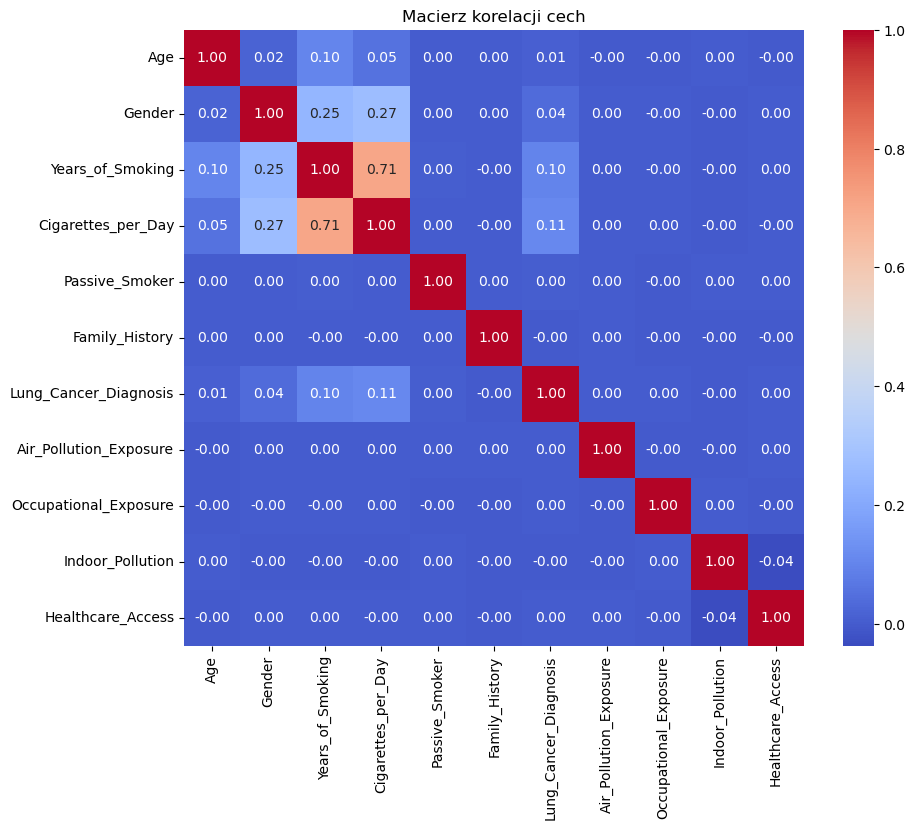

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Sprawdzenie rozkładu zmiennej celu
print("Rozkład klasyfikacji:")
print(df['Lung_Cancer_Diagnosis'].value_counts(normalize=True))

# 2. Korelacja cech liczbowych z diagnozą raka
correlations = df.corr()['Lung_Cancer_Diagnosis'].sort_values(ascending=False)
print("\nKorelacje cech z diagnozą raka płuc:")
print(correlations)

# 3. Sprawdzenie unikalnych wartości dla potencjalnie kategorycznych kolumn
for col in missing_from_describe:
    print(f"\n{col}: {df[col].nunique()} unikalnych wartości")
    print(df[col].value_counts())

# 4. Wizualizacja macierzy korelacji
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji cech")
plt.show()


In [48]:
print(df['Air_Pollution_Exposure'].value_counts())


Air_Pollution_Exposure
1    106688
0     53625
2     53402
Name: count, dtype: int64
